Nama  : Christoper Marlo

NIM   : 09011181823009

Kelas : Sistem Komputer Bukit, Palembang

# Klasifikasi Harga Ponsel menggunakan Support Vector Machine

In [1]:
# mengimport libraries yang diperlukan
import numpy as np
import pandas as pd

## Load data

In [2]:
mobile_data = pd.read_csv("train.csv")

In [3]:
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
mobile_data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


## Analisis Data

In [5]:
mobile_data.shape

(2000, 21)

In [7]:
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Dataset berisi 21 features and 2000 entries. Keterangan features sebagai berikut :

battery_power: Total energi yang dapat disimpan baterai dalam satu kali ukur, dalam mAh

blue: Mempunyai bluetooth atau tidak

clock_speed: Kecepatan mikroprosesor menjalankan instruksi

dual_sim: Memiliki dukungan dual sim atau tidak

fc: Mega piksel Kamera Depan

four_g: Memiliki 4G atau tidak

int_memory: Memori Internal dalam Gigabyte

m_dep: Ketebalan Seluler dalam cm

mobile_wt: Berat ponsel

n_cores: Jumlah inti prosesor

pc: Mega piksel Kamera Utama

px_height: Tinggi Resolusi Piksel

px_width: Lebar Resolusi Piksel

ram: Random Access Memory (RAM) dalam Megabyte

sc_h: Tinggi Layar ponsel dalam cm

sc_w: Lebar Layar ponsel dalam cm

talk_time: Waktu terlama penggunaan ponsel dalam satu kali pengisian daya baterai

three_g: Memiliki 3G atau tidak

touch_screen: Memiliki layar sentuh atau tidak

wifi: Memiliki wifi atau tidak

price_range: Merupakan variabel target dengan nilai 0 (harga rendah), 1 (harga sedang), 2 (harga tinggi) dan 3 (harga sangat tinggi).

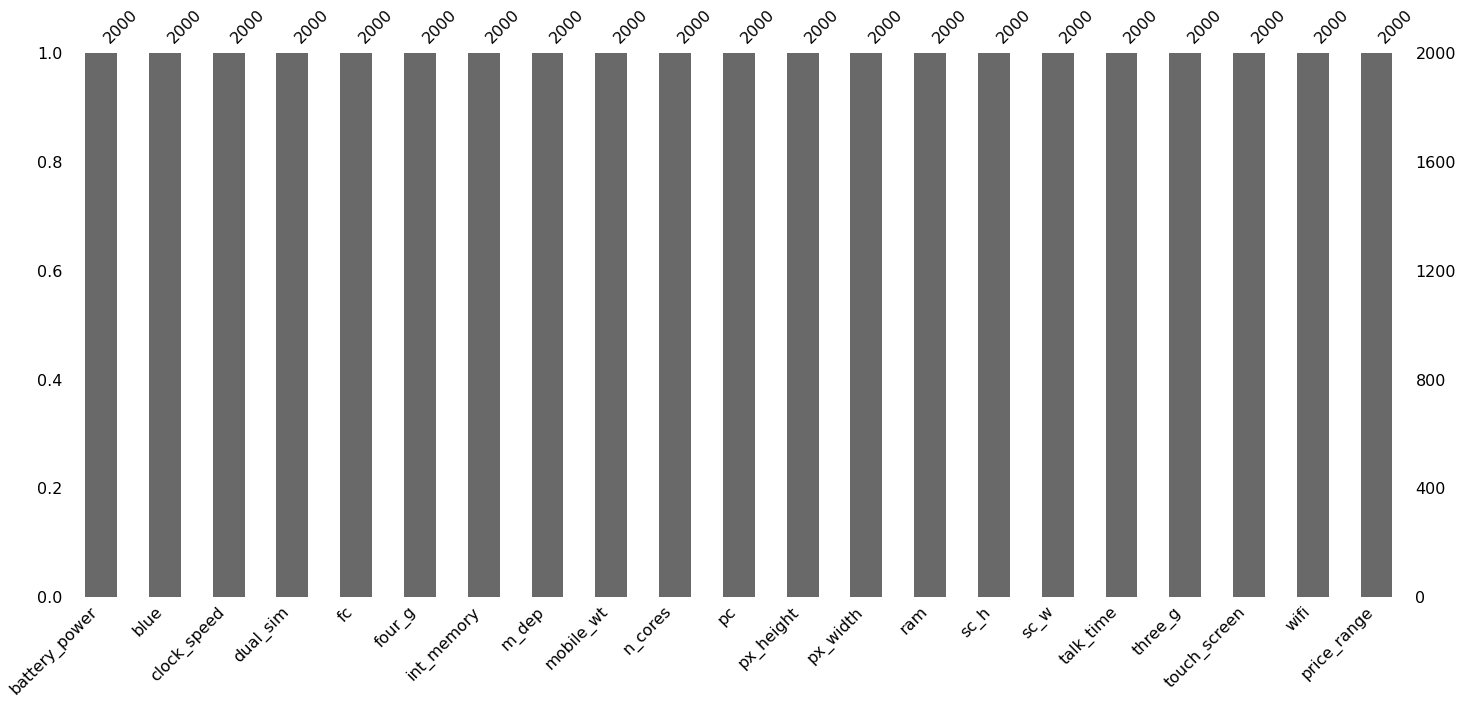

In [10]:
# memeriksa missing values
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(mobile_data)
plt.show()

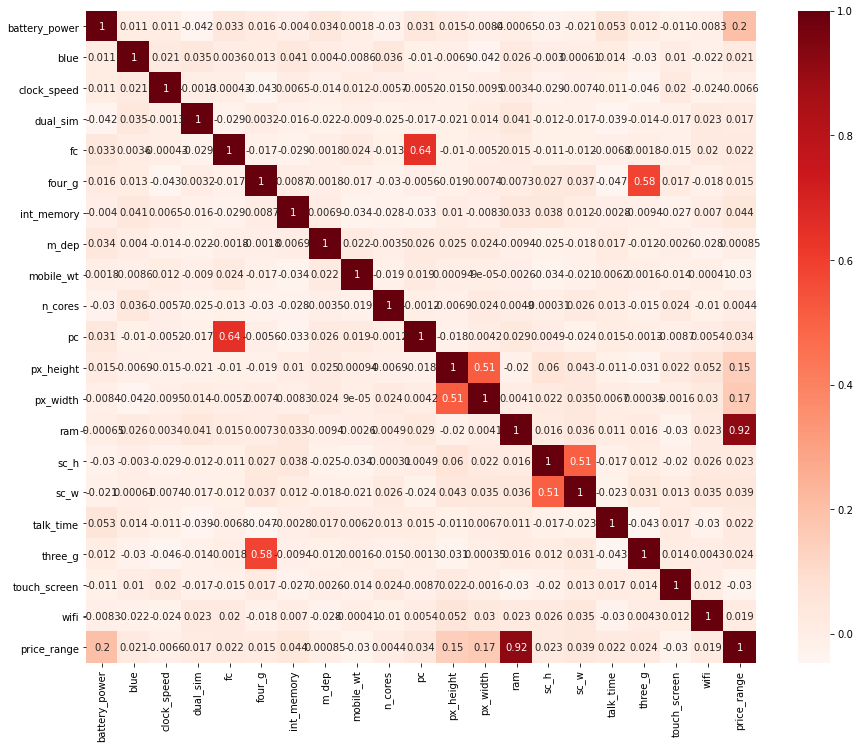

In [11]:
import seaborn as sns

# Menggunakan Pearson Correlation
plt.figure(figsize=(15,12))
cor = mobile_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

plt.show()

In [13]:
# korelasi rentang harga
cor.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

### Splitting Train dan Test

In [14]:
y = mobile_data["price_range"]
x_data=mobile_data.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

#####  Mencari keseimbangan class

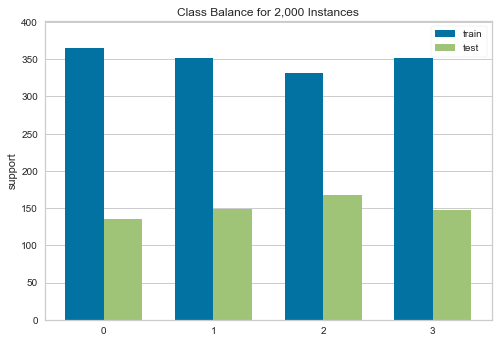

In [17]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

 ### Menggunakan model klasifikasi SVM dan mencari tingkat akurasi dari model yang digunakan

In [19]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.97
test accuracy: 0.8316666666666667


## Model dengan gridsearchcv

In [20]:
from sklearn.model_selection import GridSearchCV
C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [21]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma,decision_function_shape=decision_function_shape))
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9421428571428571
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


## Membentuk model dengan parameter terbaik

In [25]:
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)

In [28]:
svm_model.fit(x_train,y_train)

SVC(C=2, decision_function_shape='ovo', gamma='auto', kernel='linear',
    random_state=1)

In [33]:
print("train_accuracy:",svm_model.score(x_train,y_train))
print("test_accuracy: ", svm_model.score(x_test,y_test))

train_accuracy: 0.9621428571428572
test_accuracy:  0.9216666666666666


C:\Users\Win10\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


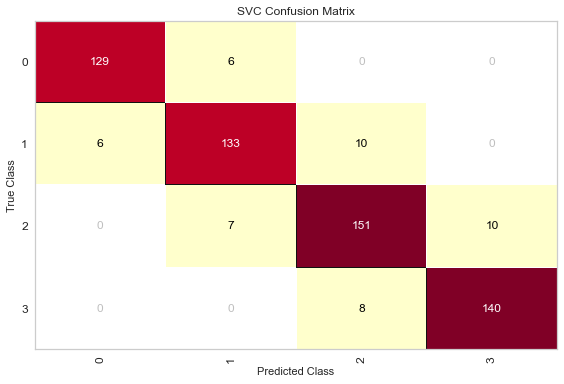

In [39]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    svm_model, classes=[0,1,2,3]
)

cm.fit(x_train, y_train)
cm.score(x_test, y_test)

cm.poof()